# Data Preprocessing 

In [1]:
pip install geopy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import colorcet as cc
import matplotlib.pyplot as plt
from geopy.distance import distance
# from matplotlib import cm
# import plotly.express as px
# import ipywidgets as widgets
# from IPython.display import display
# import re

In [3]:
# https://stackoverflow.com/questions/66572349/python-sub-state-names-for-abbrev-via-python-dict-with-re-sub
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [4]:
states = {value: key for key, value in states.items()}

In [5]:
states['Alaska']

'AK'

In [6]:
df = pd.read_csv('merge_final.csv')
statesDF = pd.read_csv('states.csv')

In [7]:
# Map full state names to abbreviations
statesDF['states'] = statesDF['state'].map(states)
# Drop the 'state' column
statesDF.drop(columns=['state'], inplace=True)

In [8]:
statesDF.head(5)

,latitude,longitude,states
0,32.7794,-86.8287,AL
1,64.0685,-152.2782,AK
2,34.2744,-111.6602,AZ
3,34.8938,-92.4426,AR
4,37.1841,-119.4696,CA


In [9]:
from math import radians, sin, cos, sqrt, atan2

# Define a function to calculate the distance between two points using the Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3958.8 # Radius of the Earth in miles
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Define a function to calculate the distance between two states
def calculate_distance(row, states_df):
    state1_info = states_df.loc[states_df['states'] == row['State1']]
    state2_info = states_df.loc[states_df['states'] == row['State2']]
    lat1, lon1 = state1_info['latitude'].values[0], state1_info['longitude'].values[0]
    lat2, lon2 = state2_info['latitude'].values[0], state2_info['longitude'].values[0]
    return haversine_distance(lat1, lon1, lat2, lon2)

# Apply the function to calculate distances for each row in the DataFrame
df['distance'] = df.apply(lambda row: calculate_distance(row, statesDF), axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34503 entries, 0 to 34502
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      34503 non-null  int64  
 1   Quarter                   34503 non-null  int64  
 2   State1                    34503 non-null  object 
 3   temperature1              34503 non-null  float64
 4   precepitation1            34503 non-null  float64
 5   windspeed1                34503 non-null  float64
 6   State2                    34503 non-null  object 
 7   temperature2              34503 non-null  float64
 8   precepitation2            34503 non-null  float64
 9   windspeed2                34503 non-null  float64
 10  airlineID                 34503 non-null  int64  
 11  Carrier                   34503 non-null  object 
 12  Passengers_by_Carrier     34503 non-null  int64  
 13  Total_Mkt_Fare            34503 non-null  float64
 14  Carrie

In [11]:
df.head(5)

,Year,Quarter,State1,temperature1,precepitation1,windspeed1,State2,temperature2,precepitation2,windspeed2,...,CarriersMktShare,CarrierAvgFare,Carrier_MinFareIncrement,CarrierMinPassangerShare,CarrierMaxFareIncrement,CarrierMaxPassengerShare,CarrierType,TDOMT_GALLONS,TDOMT_COST,distance
0,2006,3,OR,9.894872,60.482353,11.634091,WA,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,120723849.0,198330840.0,238.365847
1,2006,3,OR,9.894872,60.482353,11.634091,WA,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,122313419.0,195732437.0,238.365847
2,2006,3,OR,9.894872,60.482353,11.634091,WA,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,115493227.0,167256388.0,238.365847
3,1998,3,FL,22.033333,70.494595,13.378788,FL,22.033333,70.494595,13.378788,...,0.64,65.54,75,0.99,75,0.99,3.0,72221082.0,32085508.0,0.000000
4,1998,3,FL,22.033333,70.494595,13.378788,FL,22.033333,70.494595,13.378788,...,0.64,65.54,75,0.99,75,0.99,3.0,74240108.0,32995808.0,0.000000


In [12]:
df = df[~df.TDOMT_GALLONS.isnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34501 entries, 0 to 34502
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      34501 non-null  int64  
 1   Quarter                   34501 non-null  int64  
 2   State1                    34501 non-null  object 
 3   temperature1              34501 non-null  float64
 4   precepitation1            34501 non-null  float64
 5   windspeed1                34501 non-null  float64
 6   State2                    34501 non-null  object 
 7   temperature2              34501 non-null  float64
 8   precepitation2            34501 non-null  float64
 9   windspeed2                34501 non-null  float64
 10  airlineID                 34501 non-null  int64  
 11  Carrier                   34501 non-null  object 
 12  Passengers_by_Carrier     34501 non-null  int64  
 13  Total_Mkt_Fare            34501 non-null  float64
 14  CarriersMkt

In [13]:
states1 = df.State1.unique()
states2 = df.State2.unique()
states = list(np.unique(np.append(states1, states2)))

print(states)

['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV']


# Random Forest Regressor Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Step 1: Feature Selection: 

Select relevant features that could influence ticket prices. This includes State1, State2, temperature, precipitation, windspeed, airlineID, Carrier, Passengers_by_Carrier, and distance.

In [15]:
features = ['State1', 'State2', 'temperature1', 'precepitation1', 'windspeed1', 'temperature2', 
            'precepitation2', 'windspeed2', 'airlineID', 'Carrier', 'Passengers_by_Carrier', 'distance','TDOMT_COST']

### Step 2: Data Preprocessing:

Convert categorical variables (State1, State2, and Carrier) into numerical format using techniques like one-hot encoding. Standardize numerical features if necessary.

In [16]:
X = df[features]
y = df['Total_Mkt_Fare']

In [17]:
# Categorical and numerical features
categorical_features = ['State1', 'State2', 'Carrier']
numerical_features = ['temperature1', 'precepitation1', 'windspeed1', 'temperature2', 
                      'precepitation2', 'windspeed2', 'airlineID', 'Passengers_by_Carrier', 'distance','TDOMT_COST']

# OneHot Encoding/Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Step 3: Data Splitting: 

Split dataset into training and testing sets.(80/20 split)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Model Training: 

Train a regression model (Random Forest Regressor) using the training data.

In [19]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temperature1',
                                                   'precepitation1',
                                                   'windspeed1', 'temperature2',
                                                   'precepitation2',
                                                   'windspeed2', 'airlineID',
                                                   'Passengers_by_Carrier',
                                                   'distance', 'TDOMT_COST']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['State1', 'State2',
                                                   'Carrier'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

### Step 5: Model Evaluation & Accuracy:

Evaluate the model's performance on the testing data using  root mean squared error (RMSE) by making predictions on the data (Pairs of State 1 & State 2) & report accuracy. 

In [20]:
# Model Evaluation
train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 4.635886861923191
Test RMSE: 12.474798659857745


In [21]:
# Accuracy
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9807423617228721


# SVM Model

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

### Step 1: Feature Selection: 

Relevant features are chosen from the dataset, including information like states, carriers, weather conditions, airline ID, passengers by carrier, distance, and total market fare.

In [23]:
features = ['State1','State2','Carrier','temperature1', 'precepitation1', 'windspeed1', 'temperature2', 
                      'precepitation2', 'windspeed2', 'airlineID', 'Passengers_by_Carrier', 'distance','TDOMT_COST']

### Step 2: Data Splitting: 

The dataset is divided into two parts: features (X) and the target variable (y), where X contains the selected features, and y contains the total market fare. The data is further divided into training and testing sets using the train_test_split function from scikit-learn. 80% of the data is used for training, while 20% is reserved for testing. The random_state parameter ensures reproducibility.

In [24]:
X = df[features]
y = df['Total_Mkt_Fare']

In [25]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Preprocessing: 

Different preprocessing steps are applied to numerical and categorical features. Numerical features are scaled using standardization, while categorical features are one-hot encoded to transform them into a numerical representation suitable for machine learning algorithms.

In [26]:
# Define preprocessing for categorical and numerical features
categorical_features = ['State1', 'State2', 'Carrier']
numerical_features = ['temperature1', 'precepitation1', 'windspeed1', 'temperature2', 
                      'precepitation2', 'windspeed2', 'airlineID', 'Passengers_by_Carrier', 'distance','TDOMT_COST']

# Create preprocessing pipelines for both types of features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Step 4: Model Training: 

An SVR (Support Vector Regressor) model with an RBF (Radial Basis Function) kernel is trained on the preprocessed training data. SVR is chosen for its ability to handle both linear and non-linear relationships between features and the target variable.

In [27]:
svm_regressor = SVR(kernel='rbf')  # RBF kernel used
svm_regressor.fit(X_train_processed, y_train)

SVR()

### Step 5: Model Evaluation & Accuracy: 
The trained SVR model is used to predict the total market fare for the test data. Mean Squared Error (MSE) is calculated as a measure of the model's performance. Additionally, a custom function accuracy_percentage is defined to convert the Root Mean Squared Error (RMSE) to accuracy percentages for better interpretability. Once RMSE is calculated, it is then converted to accuracy percentages using the custom function.

In [28]:
y_pred = svm_regressor.predict(X_test_processed)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 43.569718778708584


In [29]:
def accuracy_percentage(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    data_range = y_true.max() - y_true.min()
    accuracy = (1 - (rmse / data_range)) * 100
    return accuracy

# Evaluate again
y_train_pred = svm_regressor.predict(X_train_processed)
y_test_pred = svm_regressor.predict(X_test_processed)

# train & test accuracy percentages
train_accuracy = accuracy_percentage(y_train, y_train_pred)
test_accuracy = accuracy_percentage(y_test, y_test_pred)

print("Train Accuracy Percentage:", train_accuracy)
print("Test Accuracy Percentage:", test_accuracy)

Train Accuracy Percentage: 88.43128485326575
Test Accuracy Percentage: 87.63769186848582


# Data Preprocessing (Part 2)

The models above used one-hot encoding in order to provide numerical assignments to the states when modeling. However, the models to come after this point will need the following additional preprocessing steps...

In [30]:
state_dict = {x: index for index, x in enumerate(states, start=1)}

print(state_dict)

{'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'FL': 8, 'GA': 9, 'IA': 10, 'ID': 11, 'IL': 12, 'IN': 13, 'KS': 14, 'KY': 15, 'LA': 16, 'MA': 17, 'ME': 18, 'MI': 19, 'MN': 20, 'MO': 21, 'MS': 22, 'MT': 23, 'NC': 24, 'NE': 25, 'NH': 26, 'NJ': 27, 'NM': 28, 'NV': 29, 'NY': 30, 'OH': 31, 'OK': 32, 'OR': 33, 'PA': 34, 'SC': 35, 'TN': 36, 'TX': 37, 'UT': 38, 'VA': 39, 'VT': 40, 'WA': 41, 'WI': 42, 'WV': 43}


In [31]:
df_2 = df.replace({'State1': state_dict, 'State2': state_dict})

df_2.drop(columns='Carrier', inplace=True)

df_2.head()

,Year,Quarter,State1,temperature1,precepitation1,windspeed1,State2,temperature2,precepitation2,windspeed2,...,CarriersMktShare,CarrierAvgFare,Carrier_MinFareIncrement,CarrierMinPassangerShare,CarrierMaxFareIncrement,CarrierMaxPassengerShare,CarrierType,TDOMT_GALLONS,TDOMT_COST,distance
0,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,120723849.0,198330840.0,238.365847
1,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,122313419.0,195732437.0,238.365847
2,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,115493227.0,167256388.0,238.365847
3,1998,3,8,22.033333,70.494595,13.378788,8,22.033333,70.494595,13.378788,...,0.64,65.54,75,0.99,75,0.99,3.0,72221082.0,32085508.0,0.000000
4,1998,3,8,22.033333,70.494595,13.378788,8,22.033333,70.494595,13.378788,...,0.64,65.54,75,0.99,75,0.99,3.0,74240108.0,32995808.0,0.000000


In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34501 entries, 0 to 34502
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      34501 non-null  int64  
 1   Quarter                   34501 non-null  int64  
 2   State1                    34501 non-null  int64  
 3   temperature1              34501 non-null  float64
 4   precepitation1            34501 non-null  float64
 5   windspeed1                34501 non-null  float64
 6   State2                    34501 non-null  int64  
 7   temperature2              34501 non-null  float64
 8   precepitation2            34501 non-null  float64
 9   windspeed2                34501 non-null  float64
 10  airlineID                 34501 non-null  int64  
 11  Passengers_by_Carrier     34501 non-null  int64  
 12  Total_Mkt_Fare            34501 non-null  float64
 13  CarriersMktShare          34501 non-null  float64
 14  CarrierAvgF

# Linear Regression (Baseline Model)

In [33]:
from sklearn.model_selection import train_test_split

a = df_2.to_numpy()
X = np.delete(a, 12, axis=1)
y = a[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27600, 22), (27600,), (6901, 22), (6901,))

In [35]:
def RMSE(y, ypred):
    differences = [(x-y)**2 for x, y in zip(ypred, y)]

    return np.sqrt(sum(differences) / len(differences))

def MAE(y, ypred):
    return abs(y-ypred).mean()

def get_acc(y, ypred):
    correct = []

    for i in range(len(y)):
        correct.append(y[i]==ypred[i])

    return sum(correct) / len(correct)

In [36]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
reg = clf.fit(X_train, y_train)
reg.score(X_train, y_train)

0.9398758612998753

In [37]:
preds = reg.predict(X_test)
rmse = RMSE(y_test, preds)
mae = MAE(y_test, preds)
print('Linear Regression RMSE: {}, MAE: {}'.format(rmse, mae))

Linear Regression RMSE: 21.40573609454257, MAE: 14.134479748901557


In [38]:
# classify y_train and y_test data
train = [int(y/100) for y in y_train]
test = [int(y/100) for y in y_test]

# Gradient Boosting


## Steps:
### 1) Train-Validation Split

Purpose: Splitting the original training data (X_train and train) into new training and validation sets.

Explanation: This step is crucial for evaluating the model's performance on an independent dataset (validation set) during the training process.

### 2) Initializing Gradient Boosting Model

Purpose: Initializing the Gradient Boosting model with specific hyperparameters.

Explanation: Setting up the model with parameters such as the number of boosting stages (n_estimators), the step size (learning_rate), and the maximum depth of the individual trees (max_depth).


### 3) Training the Gradient Boosting Model
Purpose: Training the Gradient Boosting model on the training set.

Explanation: Using the training set (X_train_gb, train_gb) to train the model. The model learns to predict the target variable based on the features.

### 4) Making Predictions on the Validation Set

Purpose: Using the trained Gradient Boosting model to make predictions on the validation set.

Explanation: The model predicts the target variable (val_preds) for the validation set (X_val_gb). These predictions will be compared to the actual labels (val_gb) to evaluate the model's performance.

### 5) Evaluating Accuracy on the Validation Set

Purpose: Evaluating the accuracy of the Gradient Boosting model on the validation set.

Explanation: The accuracy is calculated by comparing the predicted labels (val_preds) with the actual labels (val_gb). The result is printed to assess the model's performance.

### 6) Making Predictions on the Test Set
Using the trained Gradient Boosting model to make predictions on the test set.

Explanation: The model predicts the target variable (test_preds) for the test set (X_test). These predictions will be used to assess the model's generalization to new, unseen data.

### 7) Evaluating Accuracy on the Test Set

Purpose: Evaluating the accuracy of the Gradient Boosting model on the test set.

Explanation: The accuracy is calculated by comparing the predicted labels (test_preds) with the actual labels (test). The result is printed to assess how well the model performs on new, unseen data

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_gb, X_val_gb, train_gb, val_gb = train_test_split(X_train, train, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_gb, train_gb)

val_preds = gb_model.predict(X_val_gb)
print('Accuracy for Gradient Boosting model on validation set: {:.2%}'.format(accuracy_score(val_gb, val_preds)))

test_preds = gb_model.predict(X_test)
print('Accuracy for Gradient Boosting model on test set: {:.2%}'.format(accuracy_score(test, test_preds)))

Accuracy for Gradient Boosting model on validation set: 96.34%
Accuracy for Gradient Boosting model on test set: 96.52%


# Hybrid Model: Random Forest & Neural Networks

## Steps:
### 1) Splitting the Data
Purpose: Splitting the original training data (X_train and train) into new training and validation sets.
Explanation: This is done to have a separate portion of the data for training the base models (rf_model and nn_model) and another portion for validating their performance.
### 2) Initializing Base Models
Purpose: Initializing two base models - RandomForestClassifier (rf_model) and MLPClassifier (nn_model).
Explanation: These models will serve as the individual components of the ensemble. RandomForest is a tree-based model, and MLP (Multi-Layer Perceptron) is a neural network.
### 3) Training Base Models
Purpose: Training the base models on the training set.
Explanation: Fit the RandomForest and MLP models on the training set (X_train_base, train_base). This step allows the models to learn patterns and relationships within the training data.
### 4) Making Predictions on the Validation Set¶
Purpose: Using the trained base models to make predictions on the validation set.
Explanation: Predictions are made on the validation set (X_val_base). These predictions will be used as features for the meta-model.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Split the data into training and validation sets
X_train_base, X_val_base, train_base, val_base = train_test_split(X_train, train, test_size=0.2, random_state=42)

# Base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', random_state=42)

# Train the base models on the base training set
rf_model.fit(X_train_base, train_base)
nn_model.fit(X_train_base, train_base)

# Use the base models to make predictions on the validation set
rf_preds_val = rf_model.predict(X_val_base)
nn_preds_val = nn_model.predict(X_val_base)

# new training set for the meta-model (using predictions from base models)
X_train_meta = np.column_stack((rf_preds_val, nn_preds_val))

# Train the meta-model (e.g., logistic regression) on the new training set
meta_model = LogisticRegression()
meta_model.fit(X_train_meta, val_base)

# base models to make predictions on the test set
rf_preds_test = rf_model.predict(X_test)
nn_preds_test = nn_model.predict(X_test)

# Create a new test set for the meta-model
X_test_meta = np.column_stack((rf_preds_test, nn_preds_test))

# Use the meta-model to make final predictions on the test set
final_preds = meta_model.predict(X_test_meta)

print('Accuracy for Hybrid model: {:.2%}'.format(accuracy_score(test, final_preds)))

Accuracy for Hybrid model: 99.23%


C:\Users\qiaoy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN, Bagging Regressor and GridSearchCV

Use GridSearchCV to find the best kNN hyperparameters and push kNN to its maximum performance using bagging.

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
knn_model.score(X_test, y_test)

0.6595577874940328

#### Note: In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.  On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [43]:
preds = knn_model.predict(X_test)
rmse = RMSE(y_test, preds)
mae = MAE(y_test, preds)
print('KNN RMSE: {}, MAE: {}'.format(rmse, mae))

KNN RMSE: 52.45099541204934, MAE: 33.835951311404145


Compare predicted results with y_test (hue) by looking at 'Year' and 'Quarter' plot

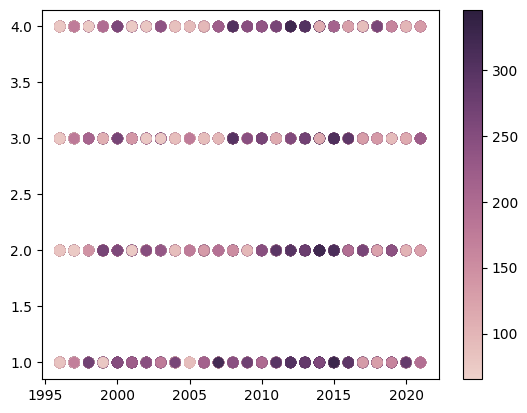

In [44]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

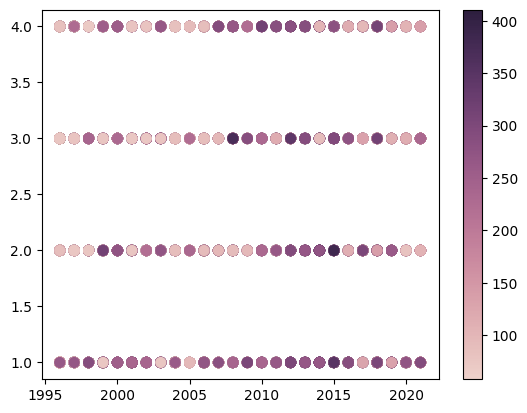

In [45]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Get best parameter 'n_neighbors' for KNN Regressor using Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

#### Note: In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.  On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [47]:
gridsearch.best_params_

{'n_neighbors': 6}

In [48]:
# train_preds_grid = gridsearch.predict(X_train)
# rmse = RMSE(y_train, train_preds_grid)
# mae = MAE(y_train, train_preds_grid)
# print('GridSearchCV for k RMSE: {}, MAE: {}'.format(rmse, mae))

test_preds_grid = gridsearch.predict(X_test)
rmse = RMSE(y_test, test_preds_grid)
mae = MAE(y_test, test_preds_grid)
print('GridSearchCV for KNN Regressor with {} RMSE: {}, MAE: {}'.format(
    gridsearch.best_params_, rmse, mae))

GridSearchCV for KNN Regressor with {'n_neighbors': 6} RMSE: 52.175046374711044, MAE: 33.85305414674202


Get best parameter 'n_neighbors' and 'weights' for KNN Regressor using Grid Search

In [49]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

#### Note: In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.  On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [50]:
gridsearch.best_params_

{'n_neighbors': 49, 'weights': 'distance'}

In [51]:
test_preds_grid = gridsearch.predict(X_test)
rmse = RMSE(y_test, test_preds_grid)
mae = MAE(y_test, test_preds_grid)
print('GridSearchCV for KNN Regressor with {} RMSE: {}, MAE: {}'.format(
    gridsearch.best_params_, rmse, mae))

GridSearchCV for KNN Regressor with {'n_neighbors': 49, 'weights': 'distance'} RMSE: 51.580969720009634, MAE: 32.81716523694069


Apply best parameter 'n_neighbors' and 'weights' for KNN Regressor to Bagging Regressor to get best performance.

In [52]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [53]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)
test_preds_grid = bagging_model.predict(X_test)
rmse = RMSE(y_test, test_preds_grid)
mae = MAE(y_test, test_preds_grid)
print('Bagging Regressor RMSE: {}, MAE: {}'.format(rmse, mae))

Bagging Regressor RMSE: 51.20863429517429, MAE: 33.14868471064301


In [54]:
# Overall bagging KNN regressor accuracy:
bagging_model.score(X_test, y_test)

0.6754943055327368